In [1]:
import random
random.seed(42)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data =pd.read_csv('/content/sample_data/Hate_Speech_Detection.csv')
data.head()

,Platform,Comment,Hateful
0,Reddit,Damn I thought they had strict gun laws in Ger...,0
1,Reddit,I dont care about what it stands for or anythi...,0
2,Reddit,It's not a group it's an idea lol,0
3,Reddit,So it's not just America!,0
4,Reddit,The dog is a spectacular dancer considering he...,0


In [7]:
data['Comment_len'] = data.loc[:,'Comment'].apply(len)
data.head(10)

,Platform,Comment,Hateful,Comment_len
0,Reddit,Damn I thought they had strict gun laws in Ger...,0,50
1,Reddit,I dont care about what it stands for or anythi...,0,89
2,Reddit,It's not a group it's an idea lol,0,33
3,Reddit,So it's not just America!,0,25
4,Reddit,The dog is a spectacular dancer considering he...,0,65
5,Reddit,If ppl dont wear masks you complain... If ppl ...,0,75
6,Reddit,We should send them All back to africa,1,39
7,Reddit,Checking to see if it's whataboutism from the ...,0,97
8,Reddit,"As a european, I approve this.",0,30
9,Reddit,"Idk which of these groups to join, they're all...",0,54


<Axes: xlabel='Hateful', ylabel='count'>

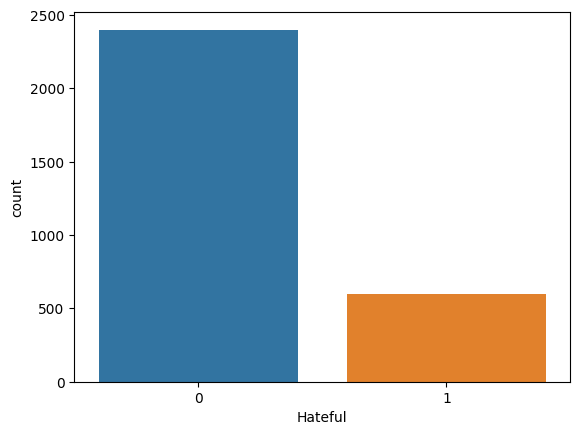

In [8]:
# count of labels
import seaborn as sns
sns.countplot(x=data['Hateful'])

<Axes: xlabel='Platform', ylabel='count'>

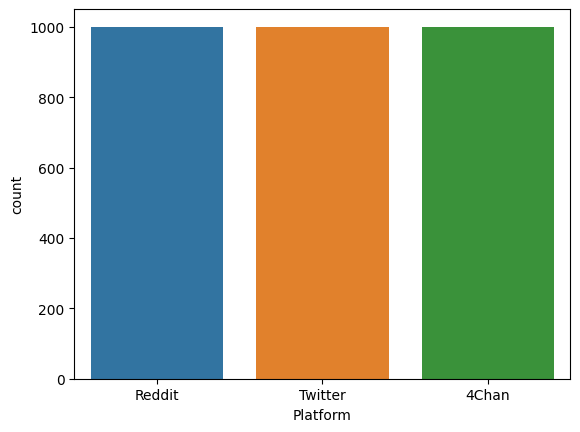

In [9]:
# count of platform
sns.countplot(x=data['Platform'])

<Axes: xlabel='Platform', ylabel='count'>

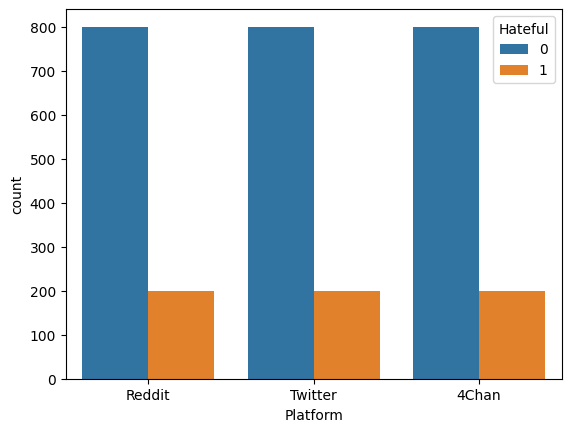

In [10]:
# count of platform
sns.countplot(x=data['Platform'], hue = 'Hateful', data = data)

In [11]:
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
## text preprocessing

from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [''.join(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
data['Comment'] = data['Comment'].apply(text_process)

In [14]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [15]:
data['Comment'] = data['Comment'].apply(listToString)

In [16]:
# Coomment length after preprocessing 

data['Comment_len_ap'] = data.loc[:,'Comment'].apply(len)
data.head(10)

,Platform,Comment,Hateful,Comment_len,Comment_len_ap
0,Reddit,Damn thought strict gun laws Germany,0,50,36
1,Reddit,dont care stands anything connected like shields,0,89,48
2,Reddit,group idea lol,0,33,14
3,Reddit,America,0,25,7
4,Reddit,dog spectacular dancer considering two left feet,0,65,48
5,Reddit,ppl dont wear masks complain ppl wear masks u ...,0,75,59
6,Reddit,send back africa,1,39,16
7,Reddit,Checking see whataboutism past yup indeed what...,0,97,59
8,Reddit,european approve,0,30,16
9,Reddit,Idk groups join theyre cool,0,54,27


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

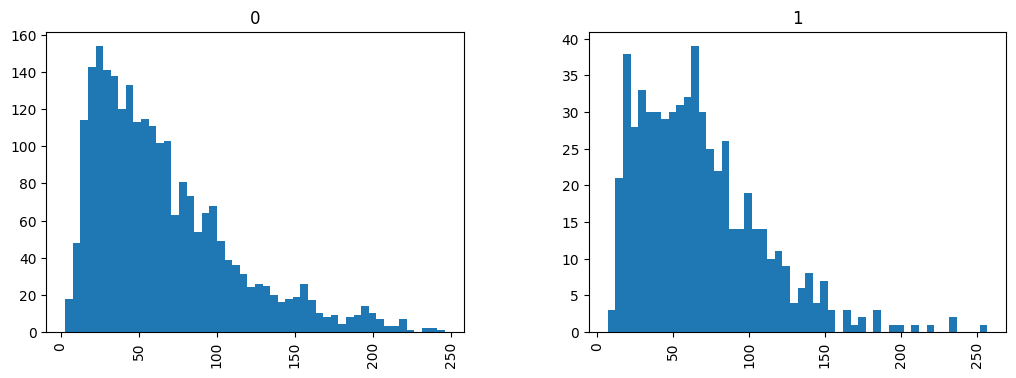

In [17]:
data.hist(column='Comment_len', by='Hateful', bins=50,figsize=(12,4))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

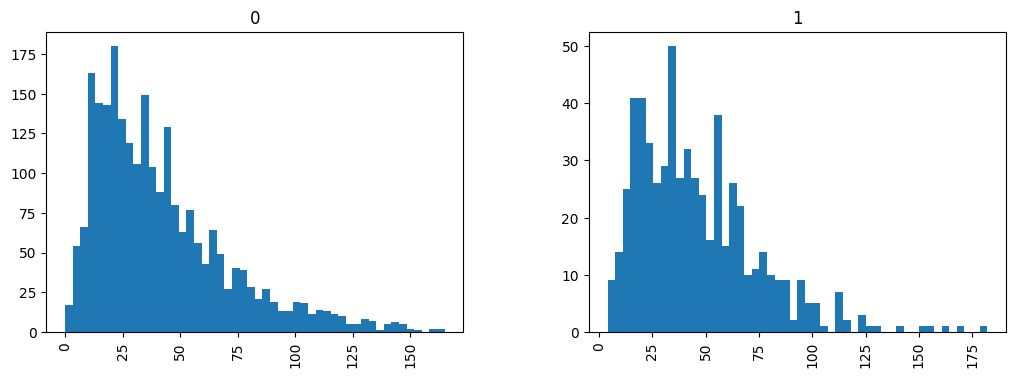

In [18]:
data.hist(column='Comment_len_ap', by='Hateful', bins=50,figsize=(12,4))

array([[<Axes: title={'center': '4Chan'}>,
        <Axes: title={'center': 'Reddit'}>],
       [<Axes: title={'center': 'Twitter'}>, <Axes: >]], dtype=object)

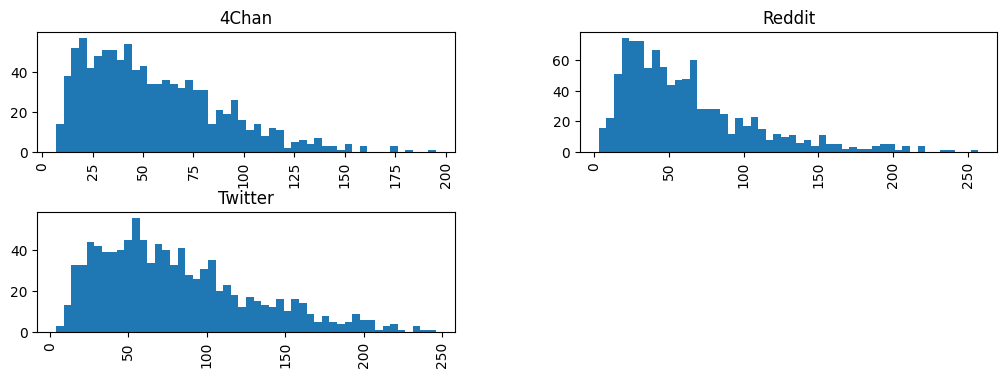

In [19]:
data.hist(column='Comment_len', by='Platform', bins=50,figsize=(12,4))

array([[<Axes: title={'center': '4Chan'}>,
        <Axes: title={'center': 'Reddit'}>],
       [<Axes: title={'center': 'Twitter'}>, <Axes: >]], dtype=object)

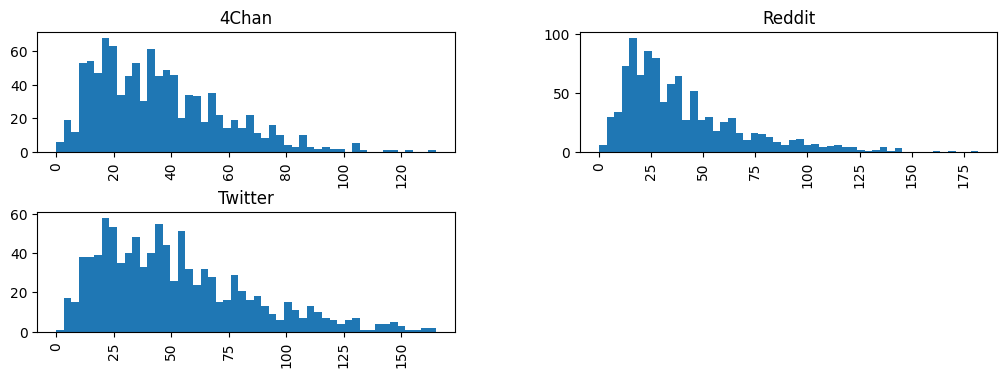

In [20]:
data.hist(column='Comment_len_ap', by='Platform', bins=50,figsize=(12,4))

In [21]:
# import necessary libraries
from wordcloud import WordCloud

# create a list of list words stored in l
list_of_sent = (data['Comment'].tolist())

print(list_of_sent)

l = []
for i in list_of_sent:
  a = i.split(' ')
  l.append(a)


['Damn thought strict gun laws Germany', 'dont care stands anything connected like shields', 'group idea lol', 'America', 'dog spectacular dancer considering two left feet', 'ppl dont wear masks complain ppl wear masks u also complain', 'send back africa', 'Checking see whataboutism past yup indeed whataboutism past', 'european approve', 'Idk groups join theyre cool', 'Sometimes messenger important message', 'future want', 'Wow monkey calls someone else monkey lol', 'gypsies America', 'know guy', 'Meal Team Six', 'guy respawn', 'Im sorry misspell Texas', 'combined gold WoW amazing though', 'chad wearing cowboy hat wedding', 'truly believe media lot peoples mental health problems', 'thats beautiful family Couldnt ask anything cuter', 'Good', 'Whats psychology behind behavior', 'feet sweating', 'group led kid eats boogers camera', 'Pineapple pizza', 'Ironic call monkey', 'stunning brave', 'Good thing police kept peace sure', 'man falling till day', 'Whatever happened organizing bowling l

In [22]:
word = []
for lt in l:
  word.extend(lt)

In [23]:
print(word)

['Damn', 'thought', 'strict', 'gun', 'laws', 'Germany', 'dont', 'care', 'stands', 'anything', 'connected', 'like', 'shields', 'group', 'idea', 'lol', 'America', 'dog', 'spectacular', 'dancer', 'considering', 'two', 'left', 'feet', 'ppl', 'dont', 'wear', 'masks', 'complain', 'ppl', 'wear', 'masks', 'u', 'also', 'complain', 'send', 'back', 'africa', 'Checking', 'see', 'whataboutism', 'past', 'yup', 'indeed', 'whataboutism', 'past', 'european', 'approve', 'Idk', 'groups', 'join', 'theyre', 'cool', 'Sometimes', 'messenger', 'important', 'message', 'future', 'want', 'Wow', 'monkey', 'calls', 'someone', 'else', 'monkey', 'lol', 'gypsies', 'America', 'know', 'guy', 'Meal', 'Team', 'Six', 'guy', 'respawn', 'Im', 'sorry', 'misspell', 'Texas', 'combined', 'gold', 'WoW', 'amazing', 'though', 'chad', 'wearing', 'cowboy', 'hat', 'wedding', 'truly', 'believe', 'media', 'lot', 'peoples', 'mental', 'health', 'problems', 'thats', 'beautiful', 'family', 'Couldnt', 'ask', 'anything', 'cuter', 'Good', 'Wh

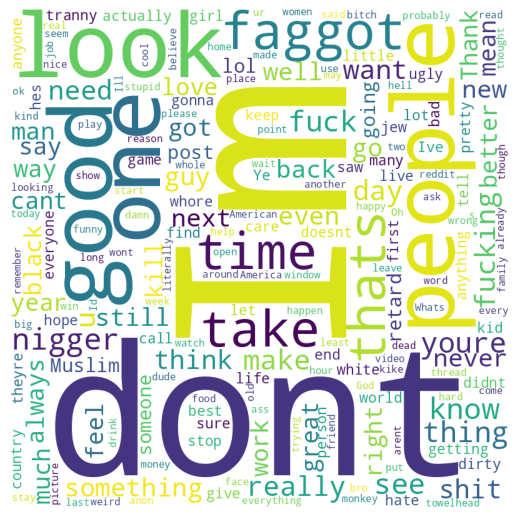

In [25]:
# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(word))

# plot the WordCloud image
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
# display the plot
plt.show()

In [26]:
# Insight with Balanced Dataset

In [27]:
data_hate = data[data['Hateful']==1]

data_no_hate = data[data['Hateful']==0]

In [28]:
data_hate.shape

(600, 5)

In [29]:
data_no_hate.shape

(2400, 5)

In [30]:
# Downsampling of no hate type (with size of hate  type 600)
data_no_hate_downsampled = data_no_hate.sample(data_hate.shape[0])
data_no_hate_downsampled.shape

(600, 5)

In [31]:
# Balanced dataset

data_balanced = pd.concat([data_no_hate_downsampled, data_hate])
data_balanced.shape

(1200, 5)

<Axes: xlabel='Hateful', ylabel='count'>

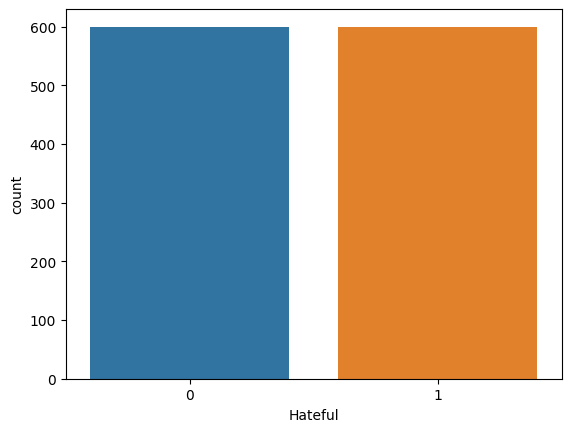

In [32]:
sns.countplot(x=data_balanced['Hateful'])

<Axes: xlabel='Platform', ylabel='count'>

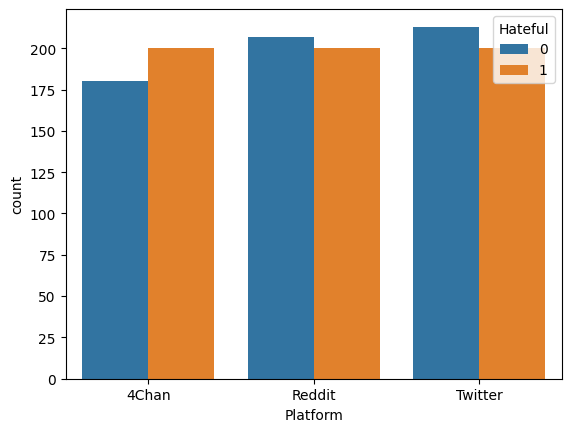

In [33]:
sns.countplot(x=data_balanced['Platform'], hue = 'Hateful', data = data_balanced)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

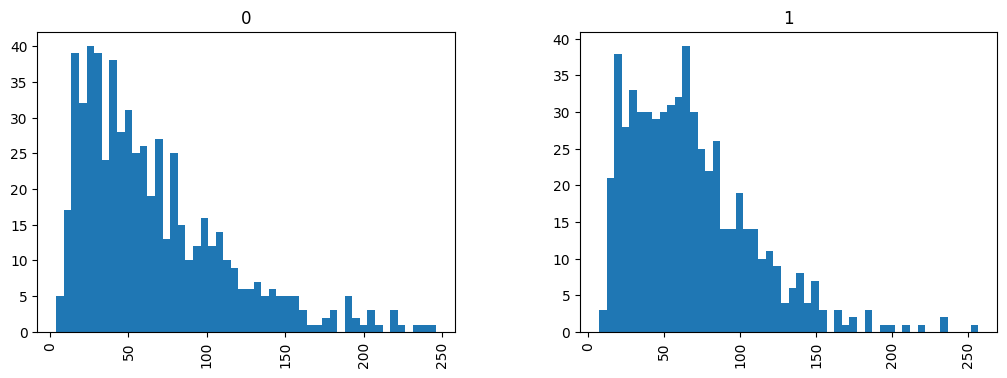

In [35]:
data_balanced.hist(column='Comment_len', by='Hateful', bins=50,figsize=(12,4))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

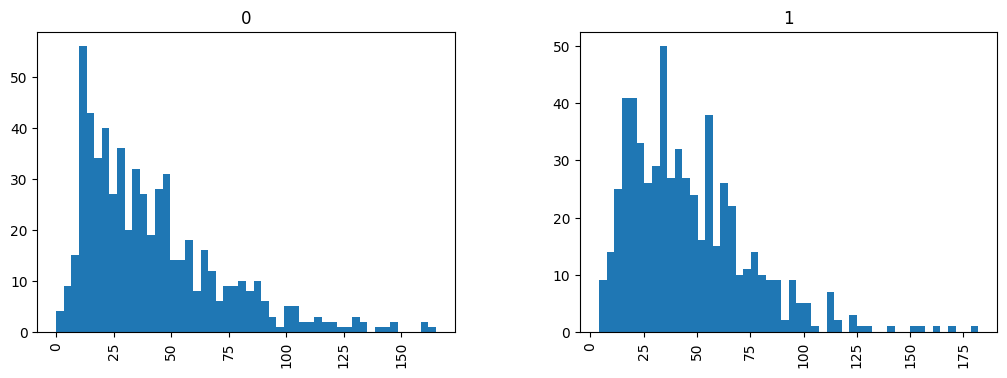

In [36]:
data_balanced.hist(column='Comment_len_ap', by='Hateful', bins=50,figsize=(12,4))

array([[<Axes: title={'center': '4Chan'}>,
        <Axes: title={'center': 'Reddit'}>],
       [<Axes: title={'center': 'Twitter'}>, <Axes: >]], dtype=object)

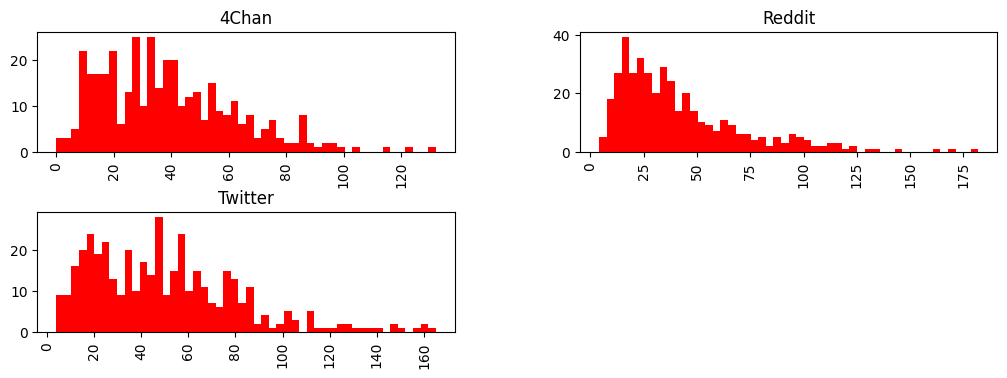

In [37]:
data_balanced.hist(column='Comment_len_ap', by='Platform', bins=50,figsize=(12,4), color = 'red')

In [38]:
# create a list of list words stored in l1 of balanced dataset
list_of_sent = (data_balanced['Comment'].tolist())

print(list_of_sent)

l1 = []
for i in list_of_sent:
  a = i.split(' ')
  l1.append(a)


['dont care copy paste', 'grad school', 'Best light room alternative thats free', 'Gordon Ramsay jizzed pants', 'moment turned 30 started getting really bad anxiety day drinking try avoid completely', 'truth whole “don’t send longer text does” thing', 'Im American Im confusion', 'quiet times like seem impactful sometimes lol definitely helps lot mind need decompress Glad could really wonders', '13TH REASON NNN', 'ok ike take time rest recover Hope feel better soon', 'Many cases', 'yeah im listening stuff like wont listen mine', 'Tip join EVERY club gets birthday treats week inbox literally flooded freebies', 'many pass users', 'xagreat need food bro', 'shiny rear end', 'love dividends', 'Gonna tense City win clinches title Liverpool win think itll go wire Id hate Utd beat', 'agree Maguire probably shouldnt picked squad due club form boo youre poor form Back managers decision IMO', 'Youre alone bro', 'smiling really died inside moment', 'walk around carrying 2 sticks', 'Lawd merthy', 'd

In [39]:
word = []
for lt in l1:
  word.extend(lt)

print(word)

['dont', 'care', 'copy', 'paste', 'grad', 'school', 'Best', 'light', 'room', 'alternative', 'thats', 'free', 'Gordon', 'Ramsay', 'jizzed', 'pants', 'moment', 'turned', '30', 'started', 'getting', 'really', 'bad', 'anxiety', 'day', 'drinking', 'try', 'avoid', 'completely', 'truth', 'whole', '“don’t', 'send', 'longer', 'text', 'does”', 'thing', 'Im', 'American', 'Im', 'confusion', 'quiet', 'times', 'like', 'seem', 'impactful', 'sometimes', 'lol', 'definitely', 'helps', 'lot', 'mind', 'need', 'decompress', 'Glad', 'could', 'really', 'wonders', '13TH', 'REASON', 'NNN', 'ok', 'ike', 'take', 'time', 'rest', 'recover', 'Hope', 'feel', 'better', 'soon', 'Many', 'cases', 'yeah', 'im', 'listening', 'stuff', 'like', 'wont', 'listen', 'mine', 'Tip', 'join', 'EVERY', 'club', 'gets', 'birthday', 'treats', 'week', 'inbox', 'literally', 'flooded', 'freebies', 'many', 'pass', 'users', 'xagreat', 'need', 'food', 'bro', 'shiny', 'rear', 'end', 'love', 'dividends', 'Gonna', 'tense', 'City', 'win', 'clinch

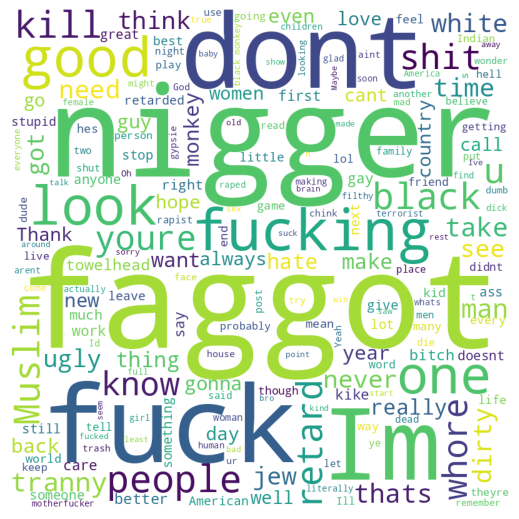

In [41]:
# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(word))

# plot the WordCloud image
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
# display the plot
plt.show()